<a href="https://colab.research.google.com/github/Redoxftw/Machine-Learning-Projects/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- First 5 Rows of the Dataset ---
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies       

/tmp/ipython-input-4233778250.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='viridis')


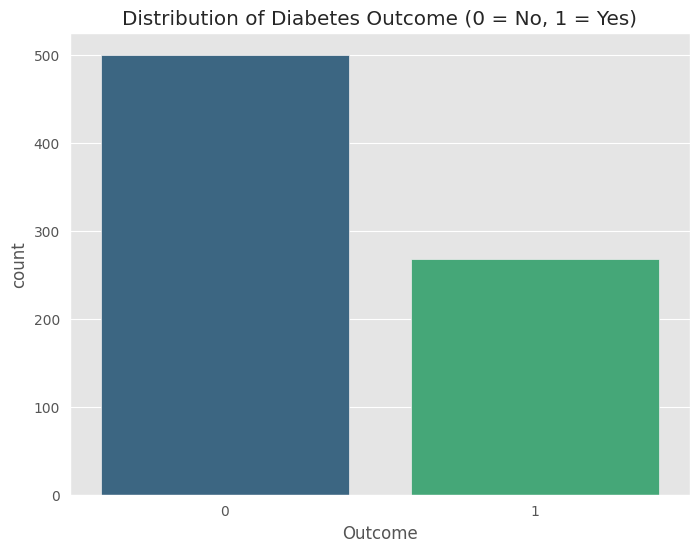

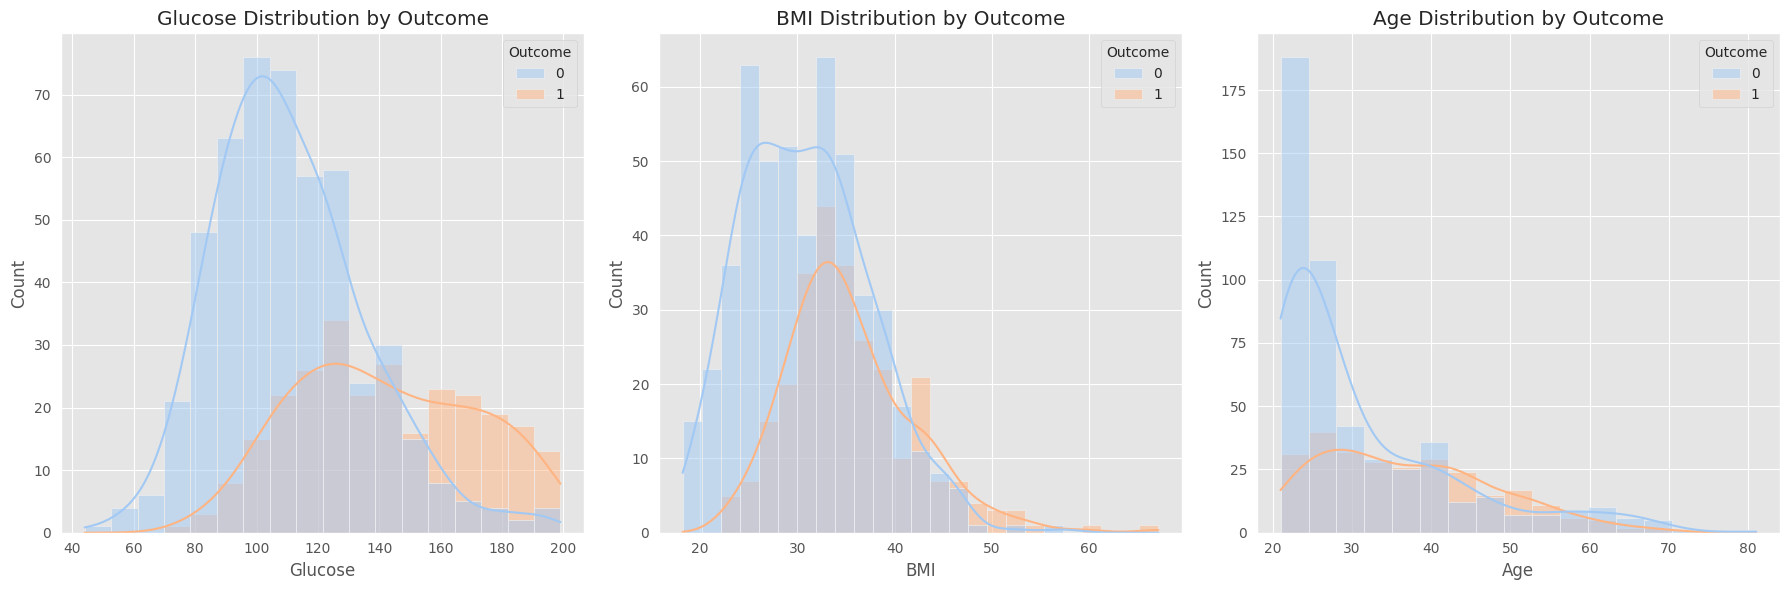

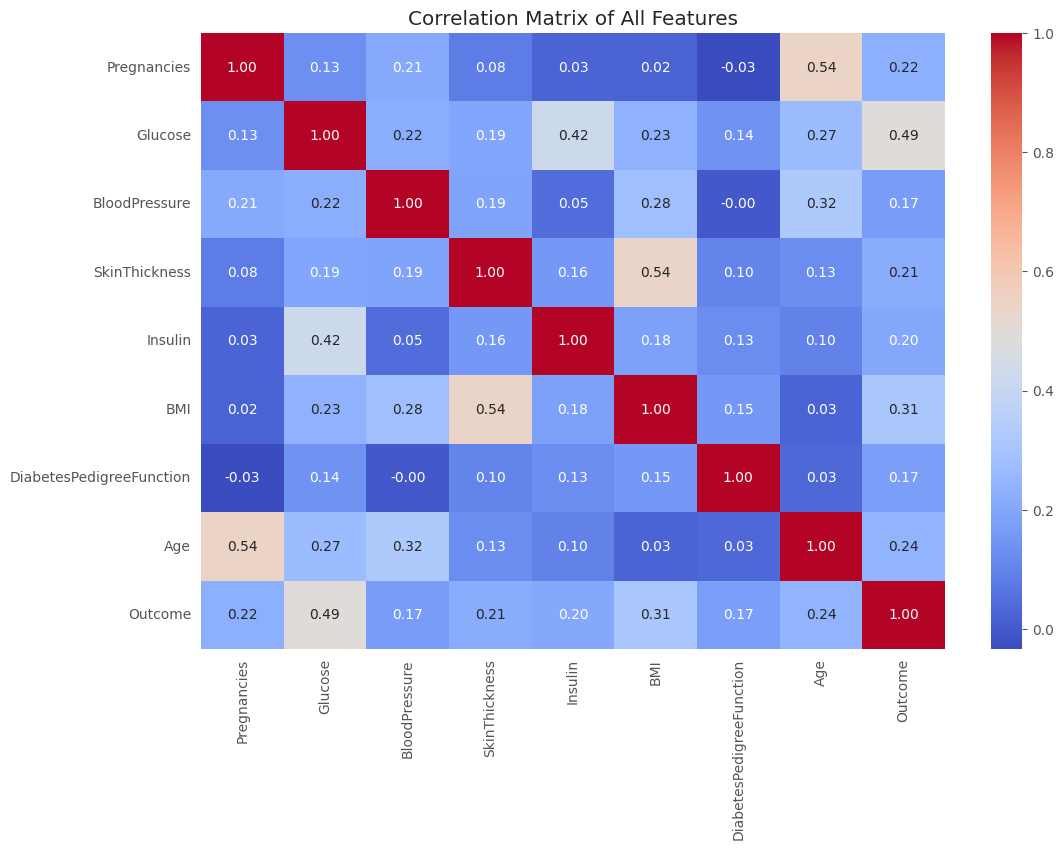



Training data shape: (614, 8)
Testing data shape: (154, 8)


--- Training the Logistic Regression Model ---
Model training complete.


--- Model Accuracy ---
Accuracy: 70.78%


--- Classification Report ---
                 precision    recall  f1-score   support

No Diabetes (0)       0.75      0.82      0.78       100
   Diabetes (1)       0.60      0.50      0.55        54

       accuracy                           0.71       154
      macro avg       0.68      0.66      0.67       154
   weighted avg       0.70      0.71      0.70       154



--- Confusion Matrix ---


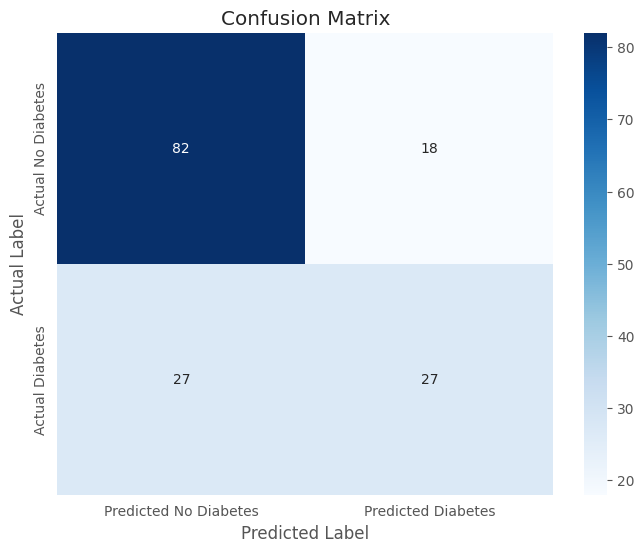

In [1]:
# -------------------------------------------------------------------
# ## 1. Setup: Import Libraries
# -------------------------------------------------------------------
# We'll import all the necessary libraries at the start.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set styles for our plots
sns.set_style('darkgrid')
plt.style.use('ggplot')

# -------------------------------------------------------------------
# ## 2. Load the Dataset
# -------------------------------------------------------------------
# We'll load the PIMA Indians Diabetes dataset directly from an online source.
data_url = "https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv"
df = pd.read_csv(data_url)

print("--- First 5 Rows of the Dataset ---")
print(df.head())
print("\n")

print("--- Dataset Information ---")
df.info()
print("\n")

# -------------------------------------------------------------------
# ## 3. Data Cleaning
# -------------------------------------------------------------------
# A critical step in this dataset. Some columns have '0' as a value,
# which is biologically impossible for features like Glucose or BMI.
# These '0's represent missing data.

print("--- Descriptive Statistics (Before Cleaning) ---")
print(df.describe())
print("\n")
print("Notice the min value of 0.00 for Glucose, BloodPressure, SkinThickness, Insulin, and BMI. This needs to be fixed.")
print("\n")

# Replace 0s with 'NaN' (Not a Number) in the columns where 0 is not a valid value
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_clean] = df[columns_to_clean].replace(0, np.nan)

# Now, we'll impute (fill in) these missing values using the median of each column.
# We use the median because it is less sensitive to outliers than the mean.
for col in columns_to_clean:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

print("--- Missing Values Check (After Imputing) ---")
print(df.isnull().sum())
print("\n")

print("--- Descriptive Statistics (After Cleaning) ---")
print(df.describe())
print("\n")

# -------------------------------------------------------------------
# ## 4. Visualization (Exploratory Data Analysis)
# -------------------------------------------------------------------
# This helps us understand the data distribution and relationships.

# --- 4a. Target Variable Distribution ---
# See how many people have diabetes (1) vs. not (0)
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df, palette='viridis')
plt.title('Distribution of Diabetes Outcome (0 = No, 1 = Yes)')
plt.show()

# --- 4b. Key Health Metrics Distribution ---
# Visualize the distribution of key metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(df, x='Glucose', hue='Outcome', kde=True, ax=axes[0], palette='pastel')
axes[0].set_title('Glucose Distribution by Outcome')

sns.histplot(df, x='BMI', hue='Outcome', kde=True, ax=axes[1], palette='pastel')
axes[1].set_title('BMI Distribution by Outcome')

sns.histplot(df, x='Age', hue='Outcome', kde=True, ax=axes[2], palette='pastel')
axes[2].set_title('Age Distribution by Outcome')

plt.tight_layout()
plt.show()

# --- 4c. Correlation Heatmap ---
# See how features are correlated with each other and the 'Outcome'
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of All Features')
plt.show()
print("\n")

# -------------------------------------------------------------------
# ## 5. Feature Preparation and Train-Test Split
# -------------------------------------------------------------------
# We need to separate our data into features (X) and the target (y).

# X contains all columns except the one we are trying to predict ('Outcome')
X = df.drop('Outcome', axis=1)
# y contains only the 'Outcome' column
y = df['Outcome']

# Split the data: 80% for training, 20% for testing
# random_state=42 ensures we get the same split every time we run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print("\n")

# --- 5b. Feature Scaling ---
# Logistic Regression performs better when all features are on a similar scale.
# We use StandardScaler to scale the data (mean=0, std=1).
# We 'fit' the scaler ONLY on the training data to prevent data leakage.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------------------------------------------
# ## 6. Model Training: Logistic Regression
# -------------------------------------------------------------------
# Now we create and train our classification model.

print("--- Training the Logistic Regression Model ---")
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
print("Model training complete.")
print("\n")

# -------------------------------------------------------------------
# ## 7. Model Evaluation
# -------------------------------------------------------------------
# Let's see how well our model performed on the unseen test data.

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# --- 7a. Accuracy ---
accuracy = accuracy_score(y_test, y_pred)
print(f"--- Model Accuracy ---")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\n")

# --- 7b. Classification Report ---
# This shows precision, recall, and F1-score for each class.
print("--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['No Diabetes (0)', 'Diabetes (1)']))
print("\n")

# --- 7c. Confusion Matrix ---
# This shows what we got right and what we got wrong in a visual way.
print("--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Diabetes', 'Predicted Diabetes'],
            yticklabels=['Actual No Diabetes', 'Actual Diabetes'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()